## Q

Import `numpy`, `pandas`, the `pyplot` module from `matplotlib`, `seaborn`, and the `stats` module from `scipy`.

## A

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

# Comparison of two group means

## Q

Load the `mi.csv` data file located in the `data` directory of the course repository.

## A

In [2]:
df = pd.read_csv('../data/mi.csv', index_col=0)
df.head()

Age OwnsHouse  PhysicalActivity     Sex LivesWithPartner LivesWithKids  \
1  22.33       Yes               3.0  Female               No            No   
2  28.83       Yes               0.0  Female              Yes            No   
3  23.67       Yes               0.0  Female              Yes            No   
4  21.17        No               0.5  Female               No            No   
5  26.17       Yes               1.5  Female               No            No   

  BornInCity  Inbreeding    BMI CMVPositiveSerology  ...  \
1        Yes     94.9627  20.13                  No  ...   
2        Yes     79.1024  21.33                 Yes  ...   
3        Yes    117.2540  22.18                  No  ...   
4         No     94.1796  18.68                  No  ...   
5        Yes    105.1250  29.01                  No  ...   

   VaccineWhoopingCough  VaccineYellowFever  VaccineHepB  VaccineFlu  SUBJID  \
1                   Yes                  No          Yes          No       2   
2                   Yes                  No          Yes          No       3   
3                    No                  No          Yes          No       4   
4                    No                  No          Yes          No       5   
5                   Yes                  No          Yes          No       8   

   DepressionScore  HeartRate Temperature HourOfSampling DayOfSampling  
1              0.0         66        36.8          8.883            40  
2              0.0         66        37.4          9.350            40  
3              0.0         62        36.9          8.667            40  
4              1.0         64        36.0          9.883            40  
5              0.0         67        36.7          8.550            81  

[5 rows x 43 columns]

## Q

Anything missing?

## A

In [3]:
df.shape

(816, 43)

In [4]:
# in Jupyter-lab, pandas is set to display dataframes with a limited number of columns
pd.options.display.max_columns = None
df.head()

Age OwnsHouse  PhysicalActivity     Sex LivesWithPartner LivesWithKids  \
1  22.33       Yes               3.0  Female               No            No   
2  28.83       Yes               0.0  Female              Yes            No   
3  23.67       Yes               0.0  Female              Yes            No   
4  21.17        No               0.5  Female               No            No   
5  26.17       Yes               1.5  Female               No            No   

  BornInCity  Inbreeding    BMI CMVPositiveSerology    FluIgG  MetabolicScore  \
1        Yes     94.9627  20.13                  No  0.464319               0   
2        Yes     79.1024  21.33                 Yes -0.049817               1   
3        Yes    117.2540  22.18                  No  0.332944               2   
4         No     94.1796  18.68                  No  0.404886               0   
5        Yes    105.1250  29.01                  No -0.303782               1   

   LowAppetite  TroubleConcentrating  TroubleSleeping  HoursOfSleep  Listless  \
1            0                     0              1.0          9.00         3   
2            0                     0              1.0          7.05         3   
3            0                     0              1.0          6.50         3   
4            0                     0              2.0         10.00         3   
5            0                     0              1.0          9.00         0   

  UsesCannabis RecentPersonalCrisis Smoking Employed     Education  \
1           No                   No   Never       No           PhD   
2           No                   No  Active      Yes  Baccalaureat   
3          Yes                   No  Active      Yes  Baccalaureat   
4           No                   No   Never       No           PhD   
5           No                   No   Never      Yes  Baccalaureat   

  DustExposure       Income HadMeasles HadRubella HadChickenPox HadMumps  \
1           No  (1000-2000]         No         No           Yes       No   
2           No  (2000-3000]         No         No           Yes       No   
3      Current  (2000-3000]         No         No           Yes       No   
4           No   (3000-inf]         No         No           Yes       No   
5           No     [0-1000]         No         No            No       No   

  HadTonsillectomy HadAppendicectomy VaccineHepA VaccineMMR VaccineTyphoid  \
1               No                No          No         No             No   
2               No                No          No         No             No   
3               No                No          No         No             No   
4               No                No          No         No             No   
5               No                No          No         No             No   

  VaccineWhoopingCough VaccineYellowFever VaccineHepB VaccineFlu  SUBJID  \
1                  Yes                 No         Yes         No       2   
2                  Yes                 No         Yes         No       3   
3                   No                 No         Yes         No       4   
4                   No                 No         Yes         No       5   
5                  Yes                 No         Yes         No       8   

   DepressionScore  HeartRate  Temperature  HourOfSampling  DayOfSampling  
1              0.0         66         36.8           8.883             40  
2              0.0         66         37.4           9.350             40  
3              0.0         62         36.9           8.667             40  
4              1.0         64         36.0           9.883             40  
5              0.0         67         36.7           8.550             81

## Q

Show a summary table for these data.

## A

In [5]:
df.describe()

Age  PhysicalActivity  Inbreeding         BMI      FluIgG  \
count  816.000000        816.000000  816.000000  816.000000  816.000000   
mean    46.485711          2.751804   91.904255   24.208958    0.203601   
std     13.854402          3.565008   12.936172    3.181184    0.232411   
min     20.170000          0.000000   43.727000   18.500000   -0.430491   
25%     35.830000          0.500000   84.077225   21.770000    0.065082   
50%     47.710000          2.000000   91.862800   23.850000    0.227855   
75%     58.352500          4.000000  100.008000   26.210000    0.363819   
max     69.750000         49.000000  150.107000   32.000000    0.769841   

       MetabolicScore  LowAppetite  TroubleConcentrating  TroubleSleeping  \
count      816.000000   816.000000            816.000000       816.000000   
mean         0.932598     0.512255              0.355392         1.119771   
std          0.893942     1.674008              1.408535         0.931400   
min          0.000000     0.000000              0.000000         0.000000   
25%          0.000000     0.000000              0.000000         0.000000   
50%          1.000000     0.000000              0.000000         1.000000   
75%          1.000000     0.000000              0.000000         2.000000   
max          4.000000    14.000000             14.000000         3.000000   

       HoursOfSleep    Listless       SUBJID  DepressionScore   HeartRate  \
count    816.000000  816.000000   816.000000       816.000000  816.000000   
mean       7.499246    1.290441   576.877451         0.544526   59.209559   
std        1.017186    2.055716   518.489935         1.333918    9.206104   
min        3.000000    0.000000     2.000000         0.000000   37.000000   
25%        7.000000    0.000000   300.750000         0.000000   54.000000   
50%        7.500000    0.000000   556.500000         0.000000   58.000000   
75%        8.000000    3.000000   779.250000         1.000000   65.000000   
max       12.000000   14.000000  5701.000000        14.000000  100.000000   

       Temperature  HourOfSampling  DayOfSampling  
count   816.000000      816.000000     816.000000  
mean     36.431985        9.214806     185.485294  
std       0.318461        0.378376      84.971737  
min      35.700000        8.433000      17.000000  
25%      36.200000        8.917000     136.000000  
50%      36.400000        9.233000     187.000000  
75%      36.600000        9.550000     263.000000  
max      37.700000       11.217000     335.000000

## Q

Inspect the distribution of variables `Age` and `OwnsHouse`.

## A

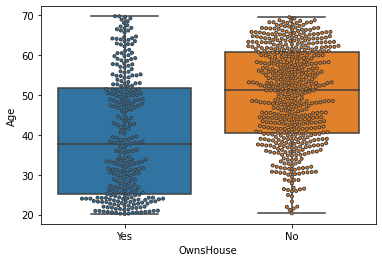

In [6]:
# categorical vs continuous => boxplot, violinplot
sns.boxplot(x='OwnsHouse', y='Age', data=df);
# optional
sns.swarmplot(x='OwnsHouse', y='Age', data=df, linewidth=1, size=3);

In [7]:
!cowsay "Where on Earth ALL younger people own a house while elder people do not?"

 _________________________________________
/ Where on Earth ALL younger people own a \
\ house while elder people do not?        /
 -----------------------------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||


## Q

Isolate the house-owners group from the others, draw their respective age distributions and check they are normally distributed.

In [8]:
group = df.groupby('OwnsHouse').groups
house_owners = group['Yes']
others = group['No']
house_owners_age = df.loc[house_owners, 'Age']
others_age = df.loc[others, 'Age']

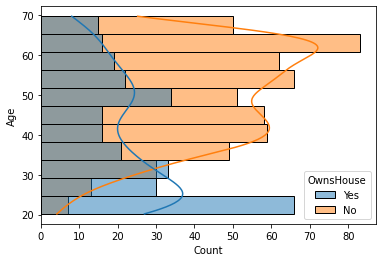

In [9]:
sns.histplot(hue='OwnsHouse', y='Age', data=df, kde=True);

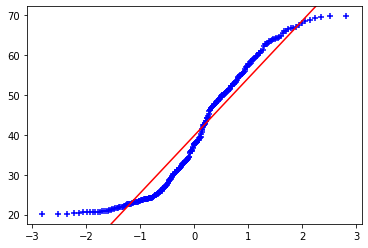

In [10]:
(theoretical_quantiles, observed_quantiles), (slope, intercept, _) = stats.probplot(house_owners_age, fit=True)
plt.scatter(theoretical_quantiles, observed_quantiles, marker='+', color='b')
plt.axline((0, intercept), slope=slope, color='r');

The red line is fitted to the blue points and does not align well on the linear part. To better illustrate what is the linear part, we reimplement the regression (the exact implementation is out of the scope of this session):

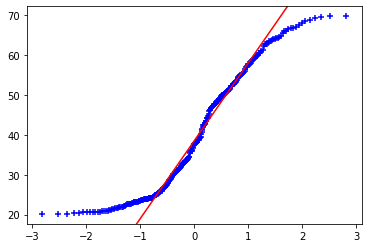

In [11]:
import statsmodels.api as sm # anticipating the next class...
central = (-1<theoretical_quantiles) & (theoretical_quantiles<1)
model = sm.OLS(observed_quantiles[central], sm.add_constant(theoretical_quantiles[central])).fit()
a, b = model.params
plt.scatter(theoretical_quantiles, observed_quantiles, marker='+', color='b')
plt.axline((0, a), slope=b, color='r');

The misalignment of the default regression line on the central part of the distribution is indicative of some asymmetry, while the diverging tails also hint at some departure from normality (kurtosis). The sampling procedure clearly excluded people younger than 20 years old or elder than 70, which results in truncated distributions.

Here, we have comfortable sample sizes and these departures from normality may not affect the power of the statistical test.

## Q

Are the sample size and variance of the two groups similar enough for running a standard $t$ test?

## A

In [12]:
len(house_owners_age), len(others_age), np.std(house_owners_age), np.std(others_age)

(288, 528, 14.830622606395378, 11.782179959362857)

`ttest_ind` allows standard deviation ratios [up to $2$](https://en.wikipedia.org/wiki/Student%27s_t-test#Equal_or_unequal_sample_sizes,_similar_variances_(1/2_%3C_sX1/sX2_%3C_2)). The groups can have different sample sizes.

## Q

Test the group mean ages equal.

## A

In [13]:
# define your significance level first!
significance_level = 0.05

# run a t-test for independent samples
stats.ttest_ind(house_owners_age, others_age)

Ttest_indResult(statistic=-10.858676761684935, pvalue=9.562420864768222e-26)

## Q

How would you report the result of this test?

## A

In [54]:
# we need:
# * the number of degrees of freedom, to give a complete report of the outcome of the t-test,
n1, n2 = len(house_owners_age), len(others_age)
degrees_of_freedom = n1 + n2 - 2

# * the mean difference (this is almost an effect size, not compared with the associated variability),
mean_difference = np.mean(house_owners_age) - np.mean(others_age)

# * and the effect size.
t, _ = stats.ttest_ind(house_owners_age, others_age)
cohen_d = t * np.sqrt(1/n1 + 1/n2)

#   alternatively:
import pingouin as pg
unbiased_cohen_d = pg.compute_effsize(house_owners_age, others_age)

degrees_of_freedom, mean_difference, cohen_d, unbiased_cohen_d

(814, -10.305953282828284, -0.7954424784394866, -0.7954424784394866)

«**In our study**, house owners ($n=288$) were found to be significantly younger than the other surveyed people ($n=528$; $10.3$ years younger on average, $t(814)=-10.9$, $p<0.05$). This effect was found to be large (Cohen's $d \approx 0.8$).»

Note: as we report the sample size for each group, we may omit the (still nice-to-have) information of the number of degrees of freedom.

## Q

\[optional; good for playing with Python rather than statistical methods\]

Although tractable in principle, the group difference in variance is quite large and -- had we smaller samples -- we could instead use the Welch's $t$ test that is known to better control for type-1 errors in cases of differing variances, but also a slightly lower power.

As it is now clear we have a relationship between age and owning a house, let us compute the rejection rate (or power) as a function of sample size.

Proposal:
* loop over decreasing sample sizes (*e.g.* 200, 50, 20, 10, 5),
* randomly pick a subsample of that size from each group,
* compare their means using the standard Student $t$-test and Welch $t$-test,
* observe whether each test successfully rejects $H_0$ for a constant significance level (*e.g.* 5%),
* replicate this procedure many times (*e.g.* 100)
* and compute the rejection rate for each sample size and type of test.

## Help: subsampling

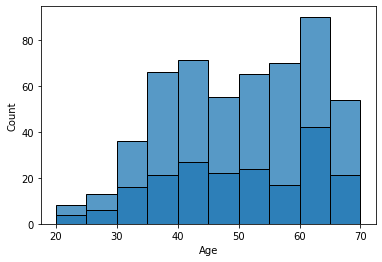

In [48]:
# let us consider an example sample
sample = others_age

# and a subsample size
n = 200

# we need a random generator
rng = np.random.default_rng()

# now we can pick n observations from the original sample
# calling the `choice` method of the random generator
subsample = rng.choice(sample, n)

# in principle the smaller sample will exhibit similar
# properties as the original sample; both are drawn from
# the population in similar ways
bins = np.arange(20, 70+1, 5)
sns.histplot(sample, bins=bins)
sns.histplot(subsample, bins=bins);

## A

In [ ]:
significance_level = 0.05

sample1 = house_owners_age
sample2 = others_age
sample_size = min(len(sample1), len(sample2))

In [41]:
from collections import defaultdict

sample_sizes = []
test_types = []
rejection_rates = []

rng = np.random.default_rng()

for relative_sample_size in (1, .2, .1, .05, .025):
    n = int(relative_sample_size * sample_size)
    nreplicates = 100
    rejections = defaultdict(lambda: 0)
    for _ in range(nreplicates):
        subsample1 = rng.choice(sample1, n)
        subsample2 = rng.choice(sample2, n)
        for test_type in ('Student', 'Welch'):
            t, pv = stats.ttest_ind(subsample1, subsample2, equal_var=test_type=='Student')
            if pv <= significance_level:
                rejections[test_type] = rejections[test_type] + 1
    for test_type in rejections:
        rejection_rates.append(rejections[test_type] / nreplicates)
        sample_sizes.append(n)
        test_types.append(test_type)
            
result = pd.DataFrame({'sample size': sample_sizes, 'test': test_types, 'power': rejection_rates})

In [42]:
result

sample size     test  power
0          288  Student   1.00
1          288    Welch   1.00
2           57  Student   0.97
3           57    Welch   0.97
4           28  Student   0.80
5           28    Welch   0.80
6           14  Student   0.55
7           14    Welch   0.55
8            7  Student   0.25
9            7    Welch   0.23

Both tests give similar results and quickly loose quite a lot of power as the sample size decreases.
$0.8$ is often considered as a reasonnable (some would say «minimal») power for a(ny) test.

Here, the quick decrease in power is likely to be intensified by the asymmetries in opposite directions, known to be deleterous for the $t$-tests.

# Comparing two distributions

Now let proceed to comparing age between people living with kids and those living without kids.
Plot the data.

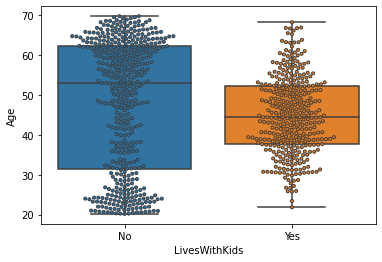

In [16]:
sns.boxplot(x='LivesWithKids', y='Age', data=df)
sns.swarmplot(x='LivesWithKids', y='Age', data=df, linewidth=1, size=3);

## Q

How do the common descriptive statistics (mean, variance) compare?

## A

In [17]:
lives_with_kids = df['Age'][df['LivesWithKids']=='Yes']
lives_without_kids = df['Age'][df['LivesWithKids']=='No']
np.mean(lives_without_kids), np.mean(lives_with_kids), np.std(lives_without_kids), np.std(lives_with_kids)

(47.758187772925766, 44.85779329608938, 16.298908849529322, 9.611832029475966)

A difference in group means is very unlikely, and the ratio of the group standard deviations is large but $<2$.

The main feature to notice is the double mode in the *lives without kids* group.
Similar samples drawn from the same population could be (more) biased towards elder or younger people, and this could result in mean differences, in a direction or another, even to the point such differences become significant.

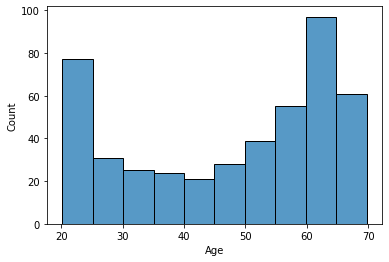

In [18]:
sns.histplot(lives_without_kids);

As a consequence, there is no point in comparing the two groups in terms of central tendency (means). A $t$-test is not suitable.

## Q

How can we compare the two groups to state they differ from one another?

## A

We need a two-sample goodness-of-fit test.

This can be done in two ways:

* with a $\chi^2$ test of homogeneity, binning the age;
* with a two-sample Kolmogorov-Smirnov test.

### Q

Bin the two groups, extract frequencies and proceed to performing a $\chi^2$ test.

### A

In [19]:
bins = np.arange(20, 70+1, 5)
lives_without_kids_freqs, _ = np.histogram(lives_without_kids, bins)
lives_with_kids_freqs, _ = np.histogram(lives_with_kids, bins)
lives_without_kids_freqs, lives_with_kids_freqs

(array([75, 32, 26, 23, 22, 30, 39, 56, 94, 61]),
 array([ 2, 12, 44, 67, 65, 53, 57, 34, 16,  8]))

Let us check we did not miss any observation:

In [20]:
assert np.sum(lives_without_kids_freqs) + np.sum(lives_with_kids_freqs) == len(df)
len(df)

816

Check there are at least 5 observations per combination of factor levels:

In [52]:
np.sort(lives_without_kids_freqs)[:3], np.sort(lives_with_kids_freqs)[:3]

(array([22, 23, 26]), array([ 2,  8, 12]))

In [21]:
chi2, pvalue, dof, _ = stats.chi2_contingency(np.stack((lives_with_kids_freqs, lives_without_kids_freqs), axis=0))
print(f'χ²({dof}) = {chi2:.1f}, p-value = {pvalue:.3g}')

χ²(9) = 228.0, p-value = 4.33e-44


### Q

Similarly, perform a two-sample Kolmogorov-Smirnov test.

### A

In [22]:
stats.ks_2samp(lives_with_kids, lives_without_kids)

KstestResult(statistic=0.31230026103290964, pvalue=1.1102230246251565e-16)

# Correlations